In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef    
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,roc_curve,auc
sns.set(style="ticks", color_codes=True)

In [2]:
df = pd.read_csv("combined_dataset.csv")
df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


In [3]:
inputs = df.drop(['label', 'domain'], axis=1)
outputs = df.label

In [4]:
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.25)
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 71932 samples.
Testing set has 23978 samples.


In [8]:
import xgboost
xgb=xgboost.XGBClassifier()

In [9]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
pred=xgb.predict(x_test)
pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
print("f1 score is ",f1_score(y_test,pred,average='weighted'))
print("matthews correlation coefficient is ",matthews_corrcoef(y_test,pred))
print("The accuracy of XGBoost on testing data is: ",100.0 *accuracy_score(y_test,pred))

f1 score is  0.951416352117712
matthews correlation coefficient is  0.8997012640008193
The accuracy of XGBoost on testing data is:  95.14555008758028


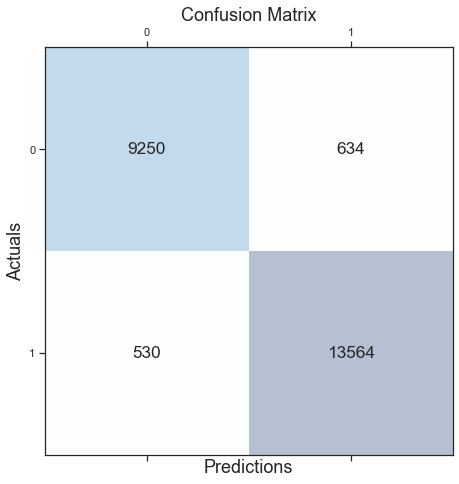

In [13]:
cm=confusion_matrix(y_test,pred)
# sns.heatmap(cm,annot=True)
# print(cm)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9884
           1       0.96      0.96      0.96     14094

    accuracy                           0.95     23978
   macro avg       0.95      0.95      0.95     23978
weighted avg       0.95      0.95      0.95     23978



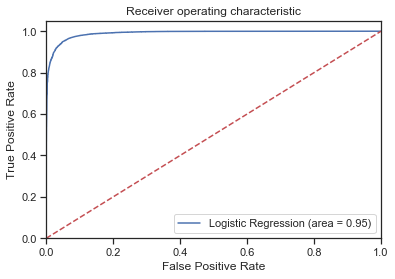

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, xgb.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [21]:
import xgboost
xgb1=xgboost.XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.1, 
                           max_depth = 5, alpha = 10, n_estimators = 10, random_state=1)


In [23]:
xgb1.fit(x_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
pred1=xgb1.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
print("f1 score is ",f1_score(y_test,pred1,average='weighted'))
print("matthews correlation coefficient is ",matthews_corrcoef(y_test,pred1))
print("The accuracy of XGBoost on testing data is: ",100.0 *accuracy_score(y_test,pred1))

f1 score is  0.9031663034151661
matthews correlation coefficient is  0.800991918528591
The accuracy of XGBoost on testing data is:  90.38285094670114
